# **Orb detector for mask detection**

**Using the Orb Detector for mask detection**

---



### **Start by mounting the drive**

**Mounting the Drive allows the notebook to access the dataset folder. You can see all the files in your Drive this way, but no one else can see them because a new VM is loaded each time. **

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Load the required modules and data**





In [3]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import cv2

from matplotlib import rcParams
rcParams['axes.grid'] = False

In [4]:
templatepath = 'gdrive/MyDrive/CV-FinalProject/step1_mask_dataset/MaskTheFace-master/masks/templates/'
imgpath = 'gdrive/MyDrive/CV-FinalProject/dataset/training/'
valpath = 'gdrive/MyDrive/CV-FinalProject/dataset/validation/'
testpath = 'gdrive/MyDrive/CV-FinalProject/dataset/test_real/'

masks = os.listdir(templatepath)
training = os.listdir(imgpath)
validation = os.listdir(valpath)
ftest = os.listdir(testpath)

## **Train the model**

**For Templates**

In [5]:
# Create orb detector object and flann matcher
orb = cv2.ORB_create(nfeatures=2000)
index_params = dict(algorithm=6, table_number=12, key_size=20, multi_probe_level=2)
search_params = dict(checks=100)
flann = cv2.FlannBasedMatcher(index_params, search_params)
keypoints = []
descriptors = []
templates = []
for i in range(21):
    template = cv2.imread(templatepath+masks[i])
    kp, des = orb.detectAndCompute(template,None)
    templates.append(template)
    keypoints.append(kp)
    descriptors.append(des)

**Non-masked images**

In [23]:
trialnum = 40
n_best_matches = []
n_best_indices = []
best_matches = []
for i in range(trialnum):
  matches = []
  img = cv2.imread(imgpath+training[i])
  kp_img, des_img = orb.detectAndCompute(img,None)
  print(training[i])
  for j in range(21):
    flann_matches = flann.knnMatch(des_img, descriptors[j], k=2)
    matches_mask = [[0, 0] for k in range(len(flann_matches))]
    good = []
    for index in range(len(flann_matches)):
      if len(flann_matches[index]) == 2:
        m, n = flann_matches[index]
        if m.distance < 0.8 * n.distance:
          matches_mask[index] = [1, 0]
          good.append(flann_matches[index])
    matches.append((templates[j], len(good)))
    index_best = 0
    best_length = 0
    for index, (image, num_good_match) in enumerate(matches):
      if num_good_match >= best_length:
        best_matches.append(good)
        best_length = num_good_match
        index_best = index
  n_best_indices.append(index_best)
  n_best_matches.append(best_length)
  #img3 = cv2.drawMatchesKnn(img,kp_img,templates[index_best],keypoints[index_best],best_matches[index_best],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  #plt.figure()
  #plt.imshow(img3)
print(n_best_matches)

01474.png
01494.png
01483.png
01487.png
01476.png
01495.png
01492.png
01493.png
01479.png
01515.png
01509.png
01514.png
01497.png
01503.png
01519.png
01499.png
01533.png
01526.png
01532.png
01527.png
01520.png
01530.png
01545.png
01547.png
01541.png
01573.png
01571.png
01572.png
01575.png
01562.png
01567.png
01557.png
01564.png
01583.png
01584.png
01594.png
01592.png
01590.png
01585.png
01593.png
[157, 146, 176, 164, 162, 168, 97, 176, 175, 170, 143, 164, 180, 153, 181, 169, 143, 139, 181, 158, 176, 153, 160, 179, 137, 126, 166, 119, 163, 193, 148, 154, 142, 184, 154, 139, 161, 174, 173, 215]


**Masked images**

In [39]:
m_best_matches = []
m_best_indices = []
best_matches = []
for i in range(trialnum):
  matches = []
  img = cv2.imread(imgpath+training[800+i])
  kp_img, des_img = orb.detectAndCompute(img,None)
  print(training[800+i])
  for j in range(21):
    flann_matches = flann.knnMatch(des_img, descriptors[j], k=2)
    matches_mask = [[0, 0] for k in range(len(flann_matches))]
    good = []
    for index in range(len(flann_matches)):
      if len(flann_matches[index]) == 2:
        m, n = flann_matches[index]
        if m.distance < 0.8 * n.distance:
          matches_mask[index] = [1, 0]
          good.append(flann_matches[index])
    matches.append((templates[j], len(good)))
    index_best = 0
    best_length = 0
    for index, (image, num_good_match) in enumerate(matches):
      if num_good_match >= best_length:
        if len(best_matches) < i or i == 0:
          best_matches.append(good)
        else:
          best_matches[i] = good
        best_length = num_good_match
        index_best = index
  m_best_indices.append(index_best)
  m_best_matches.append(best_length)
  img3 = cv2.drawMatchesKnn(img,kp_img,templates[index_best],keypoints[index_best],best_matches[index_best],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  plt.figure()
  plt.imshow(img3)
print(m_best_indices)
print(m_best_matches)

Output hidden; open in https://colab.research.google.com to view.

**Training Set Accuracy**
25/40 images identified correct mask, 62.5% accuracy

**Plot the number of matches of both masked and non-masked images.**

(array([22.,  6.,  4.,  2.,  3.,  1.,  0.,  0.,  1.,  1.]),
 array([116. , 182.3, 248.6, 314.9, 381.2, 447.5, 513.8, 580.1, 646.4,
        712.7, 779. ]),
 <a list of 10 Patch objects>)

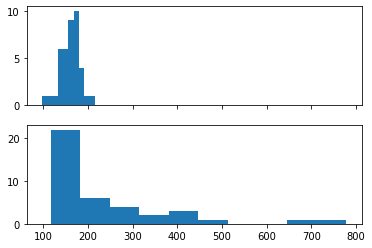

In [24]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].hist(n_best_matches, bins = 10)
ax[1].hist(m_best_matches, bins = 10)

## **Test the identified keypoints on validation set**

**Non-masked images**

In [17]:
n_best_matches = []
n_best_indices = []
best_matches = []
for i in range(trialnum):
  matches = []
  img = cv2.imread(valpath+validation[i])
  kp_img, des_img = orb.detectAndCompute(img,None)
  print(validation[i])
  for j in range(21):
    flann_matches = flann.knnMatch(des_img, descriptors[j], k=2)
    matches_mask = [[0, 0] for k in range(len(flann_matches))]
    good = []
    for index in range(len(flann_matches)):
      if len(flann_matches[index]) == 2:
        m, n = flann_matches[index]
        if m.distance < 0.8 * n.distance:
          matches_mask[index] = [1, 0]
          good.append(flann_matches[index])
    matches.append((templates[j], len(good)))
    index_best = 0
    best_length = 0
    for index, (image, num_good_match) in enumerate(matches):
      if num_good_match >= best_length:
        if len(best_matches) < i or i == 0:
          best_matches.append(good)
        else:
          best_matches[i] = good
        best_length = num_good_match
        index_best = index
  n_best_indices.append(index_best)
  n_best_matches.append(best_length)
  #img3 = cv2.drawMatchesKnn(img,kp_img,templates[index_best],keypoints[index_best],best_matches[index_best],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  #plt.figure()
  #plt.imshow(img3)
print(n_best_matches)

00268.png
00575.png
01488.png
01599.png
01942.png
00027.png
00011.png
00031.png
00016.png
00078.png
00095.png
00124.png
00108.png
00093.png
00171.png
00210.png
00211.png
00195.png
00197.png
00222.png
00251.png
00266.png
00270.png
00358.png
00348.png
00408.png
00423.png
00446.png
00525.png
00530.png
00552.png
00578.png
00587.png
00596.png
00600.png
00656.png
00635.png
00660.png
00684.png
00680.png
[100, 193, 215, 209, 167, 153, 154, 202, 223, 170, 154, 58, 187, 155, 147, 171, 127, 177, 167, 176, 183, 214, 173, 152, 119, 169, 179, 160, 179, 178, 169, 148, 137, 131, 128, 176, 160, 131, 162, 157]


**Masked images**

In [41]:
m_best_matches = []
m_best_indices = []
best_matches = []
for i in range(trialnum):
  matches = []
  img = cv2.imread(valpath+validation[100+i])
  kp_img, des_img = orb.detectAndCompute(img,None)
  print(validation[100+i])
  for j in range(21):
    flann_matches = flann.knnMatch(des_img, descriptors[j], k=2)
    matches_mask = [[0, 0] for k in range(len(flann_matches))]
    good = []
    for index in range(len(flann_matches)):
      if len(flann_matches[index]) == 2:
        m, n = flann_matches[index]
        if m.distance < 0.8 * n.distance:
          matches_mask[index] = [1, 0]
          good.append(flann_matches[index])
    matches.append((templates[j], len(good)))
    index_best = 0
    best_length = 0
    for index, (image, num_good_match) in enumerate(matches):
      if num_good_match >= best_length:
        if len(best_matches) < i or i == 0:
          best_matches.append(good)
        else:
          best_matches[i] = good
        best_length = num_good_match
        index_best = index
  m_best_indices.append(index_best)
  m_best_matches.append(best_length)
  img3 = cv2.drawMatchesKnn(img,kp_img,templates[index_best],keypoints[index_best],best_matches[index_best],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  plt.figure()
  plt.imshow(img3)
print(m_best_indices)
print(m_best_matches)

Output hidden; open in https://colab.research.google.com to view.

**Validation Set Accuracy**
24/40 images identified correct mask, 60.0% accuracy

## **Final Test on real images**

In [45]:
overall_best_matches = []
overall_best_indices = []
best_matches = []
for i in range(trialnum):
  matches = []
  img = cv2.imread(testpath+ftest[i])
  print(ftest[i])
  for j in range(21):
    flann_matches = flann.knnMatch(des_img, descriptors[j], k=2)
    matches_mask = [[0, 0] for k in range(len(flann_matches))]
    good = []
    for index in range(len(flann_matches)):
      if len(flann_matches[index]) == 2:
        m, n = flann_matches[index]
        if m.distance < 0.8 * n.distance:
          matches_mask[index] = [1, 0]
          good.append(flann_matches[index])
    matches.append((templates[j], len(good)))
    index_best = 0
    best_length = 0
    for index, (image, num_good_match) in enumerate(matches):
      if num_good_match >= best_length:
        if len(best_matches) < i or i == 0:
          best_matches.append(good)
        else:
          best_matches[i] = good
        best_length = num_good_match
        index_best = index
  overall_best_indices.append(index_best)
  overall_best_matches.append(best_length)
  img3 = cv2.drawMatchesKnn(img,kp_img,templates[index_best],keypoints[index_best],best_matches[index_best],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  plt.figure()
  plt.imshow(img3)
print(overall_best_indices)
print(overall_best_matches)

Output hidden; open in https://colab.research.google.com to view.